In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from urllib.parse import urlencode

In [3]:
# Чтение данных из облака
def download_link(public_key):

    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
    final_url = base_url + urlencode(dict(public_key=public_key))
    response = requests.get(final_url)
    download_url = response.json()['href']
    return download_url

In [4]:
user_data = pd.read_csv(download_link('https://disk.yandex.ru/d/W9c3IWXItRzNkw'))
logs = pd.read_csv(download_link('https://disk.yandex.ru/d/jAB5Ho5fljqKuw'))

In [5]:
user_data.isnull().sum()

client     0
premium    0
age        0
dtype: int64

In [6]:
logs.isnull().sum()

client      0
success     0
platform    0
time        0
dtype: int64

Сколько уникальных значений принимает переменная platform?

In [7]:
logs.platform.nunique()

3

Какой клиент совершил больше всего успешных операций?

In [23]:
logs.query('success == True') \
    .groupby('client', as_index=False) \
    .agg({'success': 'count'}) \
    .rename(columns={'success': 'success_operations'}) \
    .query('success_operations == 41') \
    .sort_values('client') 

,client,success_operations
332,12179,41
810,28719,41
1020,36165,41
1487,52870,41
1758,61468,41
1759,61473,41
2231,78349,41
2345,82563,41
2626,92584,41


С какой платформы осуществляется наибольшее количество успешных операций?

In [24]:
logs.value_counts('platform', normalize=True)

platform
phone       0.611778
computer    0.334444
tablet      0.053778
dtype: float64

Какая платформа наиболее популярна среди премиумных клиентов?

In [25]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [26]:
user_data.merge(logs, how='inner', on='client') \
    .query('premium == True') \
    .value_counts('platform') \
    .head(1)

platform
phone    246
dtype: int64

In [27]:
merged_df = user_data.merge(logs, on='client')

In [28]:
merged_df.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


In [29]:
merged_df_premium = merged_df.query('premium == True')

In [30]:
merged_df_usual = merged_df.query('premium == False')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

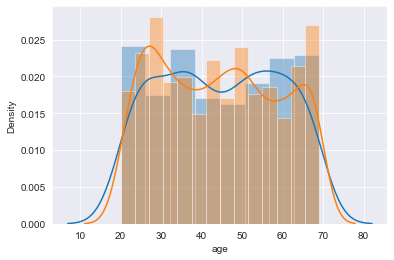

In [31]:
sns.distplot(merged_df_premium.age)
sns.distplot(merged_df_usual.age)

In [32]:
merged_df.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


In [33]:
operations_df = merged_df.groupby('client', as_index=False) \
        .agg({'success': 'count', 'client': 'count'})

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='success', ylabel='Density'>

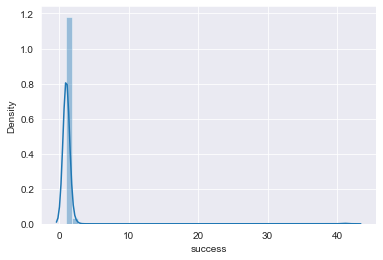

In [34]:
sns.distplot(operations_df.success)

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, y – число успешных операций. Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки. 

In [35]:
age_computer_df = merged_df[['age', 'platform', 'success']].query("platform == 'computer' and success == True")
age_computer_df.head()

,age,platform,success
3,44,computer,True
12,24,computer,True
14,40,computer,True
20,35,computer,True
26,48,computer,True


<AxesSubplot:xlabel='age', ylabel='count'>

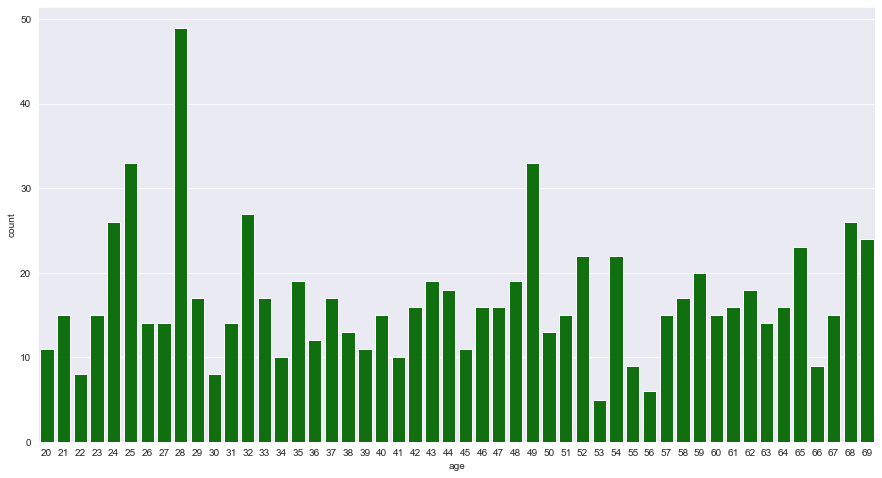

In [41]:
plt.figure(figsize=(15, 8))
sns.countplot(x='age',
              data=age_computer_df,
              color='g')